In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **_Dataset Found HERE:_**

## [**_Citywide Payroll Data (Fiscal Year)_**](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e)

## Table of Contents:
>* [**Importing** and **cleaning** of the dataset](#cleaning)<a id='cleaning'></a>
* [Assignment 4: Question 1, **Principal Component Analysis**](#question1)<a href='#question1'></a>
* [Assignment 4: Question 2, **Python Outlier Detection Methods**](#question2)<a href='#question2'></a>

# **Importing the dataset:**
<a href='#cleaning'></a>

In [300]:
df = pd.read_csv('assignment_4_dataset.csv', low_memory=False)

# Now that the data is imported, I am going to do some blanket changes:
>- Investigate **NaN** values within each column and then **drop** various values
- Strip all extra whitespace for string columns
- Lowercase all entries that are string columns

In [172]:
#Dropping various aspects.

df = df.drop(['Payroll Number', 'Mid Init'], axis=1) #drop these two since they have substantial NaN's
df = df.dropna(subset=['First Name', 'Last Name', 'Title Description'], axis='rows') #Dropping the NaN's from these columns
df['Work Location Borough'] = df['Work Location Borough'].replace(np.nan, 'other') #Replacing NaN in Work Location Borough with Unknown

In [173]:
df.isnull().sum() #NaN's are now removed

Fiscal Year                   0
Agency Name                   0
Last Name                     0
First Name                    0
Agency Start Date             0
Work Location Borough         0
Title Description             0
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
OT Hours                      0
Total OT Paid                 0
Total Other Pay               0
dtype: int64

In [174]:
print(df.info())
print('\nNUMBER of UNIQUE in EACH column:\n', df.apply(lambda x: x.nunique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739296 entries, 0 to 2740648
Data columns (total 15 columns):
Fiscal Year                   int64
Agency Name                   object
Last Name                     object
First Name                    object
Agency Start Date             object
Work Location Borough         object
Title Description             object
Leave Status as of June 30    object
Base Salary                   float64
Pay Basis                     object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtypes: float64(6), int64(1), object(8)
memory usage: 334.4+ MB
None

NUMBER of UNIQUE in EACH column:
 Fiscal Year                         5
Agency Name                       304
Last Name                      143761
First Name                      78909
Agency Start Date               14227
Work Location Borough            

In [175]:
# I am stripping any whitespace and then changing all strings to lower case from each column titled 'object'.
# Compare the changes with the previous entry.

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
print('\nNUMBER of UNIQUE in EACH column:\n', df.apply(lambda x: x.nunique()))


NUMBER of UNIQUE in EACH column:
 Fiscal Year                         5
Agency Name                       164
Last Name                      143754
First Name                      78874
Agency Start Date               14227
Work Location Borough              18
Title Description                1684
Leave Status as of June 30          5
Base Salary                     79952
Pay Basis                           4
Regular Hours                   72685
Regular Gross Paid            1315887
OT Hours                        46781
Total OT Paid                  600761
Total Other Pay                570954
dtype: int64


# Now, I will investigate individual columns.

In [176]:
print('\nFiscal Year:',df['Fiscal Year'].unique()) # There are 5 unique values, but what are they?
print('\nPay Basis:',df['Pay Basis'].unique())
print('\nLeave Status as of June 30:',df['Leave Status as of June 30'].unique())
print('\nWork Location Borough:\n\n', df['Work Location Borough'].unique())
print('\nPercent in each Work Location Borough:\n\n',df['Work Location Borough'].value_counts(normalize=True))


Fiscal Year: [2018 2017 2016 2015 2014]

Pay Basis: ['per annum' 'per day' 'per hour' 'prorated annual']

Leave Status as of June 30: ['active' 'ceased' 'on leave' 'on separation leave' 'seasonal']

Work Location Borough:

 ['manhattan' 'albany' 'brooklyn' 'washington dc' 'queens' 'bronx'
 'richmond' 'ulster' 'westchester' 'delaware' 'schoharie' 'dutchess'
 'greene' 'putnam' 'sullivan' 'nassau' 'other' 'orange']

Percent in each Work Location Borough:

 manhattan        0.566284
other            0.206582
queens           0.090992
brooklyn         0.079123
bronx            0.044054
richmond         0.011123
westchester      0.000808
ulster           0.000457
sullivan         0.000201
delaware         0.000138
putnam           0.000058
nassau           0.000058
schoharie        0.000041
dutchess         0.000029
albany           0.000022
greene           0.000014
washington dc    0.000010
orange           0.000007
Name: Work Location Borough, dtype: float64


In [177]:
# Seeing that 'other' is 20.7% of the data, I am dropping this value.

df['Work Location Borough'] = df['Work Location Borough'].replace('other', np.nan)
df = df.dropna()

print('\nPercent in each Work Location Borough:\n\n',df['Work Location Borough'].value_counts(normalize=True))
print('\n\nNUMBER of UNIQUE in EACH column:\n', df.apply(lambda x: x.nunique()))


Percent in each Work Location Borough:

 manhattan        0.713727
queens           0.114683
brooklyn         0.099724
bronx            0.055524
richmond         0.014019
westchester      0.001019
ulster           0.000576
sullivan         0.000253
delaware         0.000173
putnam           0.000074
nassau           0.000073
schoharie        0.000052
dutchess         0.000037
albany           0.000027
greene           0.000018
washington dc    0.000013
orange           0.000008
Name: Work Location Borough, dtype: float64


NUMBER of UNIQUE in EACH column:
 Fiscal Year                         5
Agency Name                       160
Last Name                      139358
First Name                      76462
Agency Start Date               14090
Work Location Borough              17
Title Description                1639
Leave Status as of June 30          5
Base Salary                     72176
Pay Basis                           4
Regular Hours                   66234
Regular Gross Paid

In [179]:
df['Agency Name'] = df['Agency Name'].replace('bronx da', 'bronx district attorney')
df['Agency Name'] = df['Agency Name'].replace('queens da', 'queens district attorney')
df['Agency Name'] = df['Agency Name'].replace('richmond da', 'richmond district attorney')
df['Agency Name'] = df['Agency Name'].replace('manhattan da', 'manhattan district attorney')
df['Agency Name'] = df['Agency Name'].replace('district attorney-manhattan', 'manhattan district attorney')
df['Agency Name'] = df['Agency Name'].replace('district attorney richmond cou', 'richmond district attorney')
df['Agency Name'] = df['Agency Name'].replace('district attorney-manhattan', 'manhattan district attorney')
df['Agency Name'] = df['Agency Name'].replace('district attorney-manhattan', 'manhattan district attorney')
df['Agency Name'] = df['Agency Name'].replace('dept', 'department')
print('\nNumber of unique values:', df['Agency Name'].nunique())
print('\nPercent in each Agency Name:\n\n',df['Agency Name'].value_counts(normalize=True).head())
#list(df['Agency Name'].unique())


Number of unique values: 157

Percent in each Agency Name:

 dept of ed pedagogical            0.170749
dept of ed per session teacher    0.148079
police department                 0.113858
dept of ed para professionals     0.062292
board of election poll workers    0.061635
Name: Agency Name, dtype: float64


In [180]:
df['Agency Start Date'] = pd.to_datetime(df['Agency Start Date'], infer_datetime_format=True, errors = 'coerce')

df['Agency Start Date'].head()

0   2015-12-07
1   1999-01-25
2   2002-05-28
3   1999-01-26
4   2016-12-05
Name: Agency Start Date, dtype: datetime64[ns]

In [181]:
print('\nPercent in each Title Description:\n\n',df['Title Description'].value_counts(normalize=False).head(10))


Percent in each Title Description:

 teacher- per session         313892
teacher                      214800
election worker              132153
police officer               107103
annual ed para               106350
teacher special education     92855
teacher-general ed            49912
correction officer            41215
firefighter                   36171
job training participant      34432
Name: Title Description, dtype: int64


In [190]:
## So, I have decided to widdle down the data to 747 entries of 'principal administrative assosciate' to compare their data.

In [234]:
mask = df['Title Description'] == 'principal administrative associate'
df_principal = df[mask]

mask2 = df_principal['Pay Basis'] == 'per annum'
df_principal = df_principal[mask2]

mask3 = df['Agency Name'] == 'department of education admin'
df_principal = df_principal[mask3]

df_principal = df_principal.reset_index(drop=True)
df_principal.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2017,department of education admin,barnaby,omaida,1993-06-28,manhattan,principal administrative associate,active,67608.0,per annum,1825.0,68375.82,0.0,0.0,4071.62
1,2017,department of education admin,brown,angella,1998-03-30,brooklyn,principal administrative associate,active,58607.0,per annum,1825.0,59269.63,0.0,0.0,1683.18
2,2017,department of education admin,crawford,colette,1999-12-01,manhattan,principal administrative associate,active,53831.0,per annum,1825.0,54437.70,0.0,0.0,4063.37
3,2017,department of education admin,dunn,michelle,1995-05-08,manhattan,principal administrative associate,active,50858.0,per annum,1825.0,51430.42,0.0,0.0,2355.30
4,2017,department of education admin,galarza,carmen,1986-11-20,manhattan,principal administrative associate,active,72370.0,per annum,1825.0,73193.41,0.0,0.0,4063.37


In [235]:
df_principal['Work Location Borough'].value_counts(normalize=True)

manhattan    0.678715
brooklyn     0.228916
queens       0.081660
bronx        0.005355
richmond     0.004016
orange       0.001339
Name: Work Location Borough, dtype: float64

In [246]:
mask1 = df_principal['Work Location Borough'] != 'richmond' 
mask2 = df_principal['Work Location Borough'] !=  'orange'
df_principal = df_principal[mask1]
df_principal = df_principal[mask2]
print(df_principal['Work Location Borough'].value_counts(normalize=False))

manhattan    507
brooklyn     171
queens        61
bronx          4
Name: Work Location Borough, dtype: int64


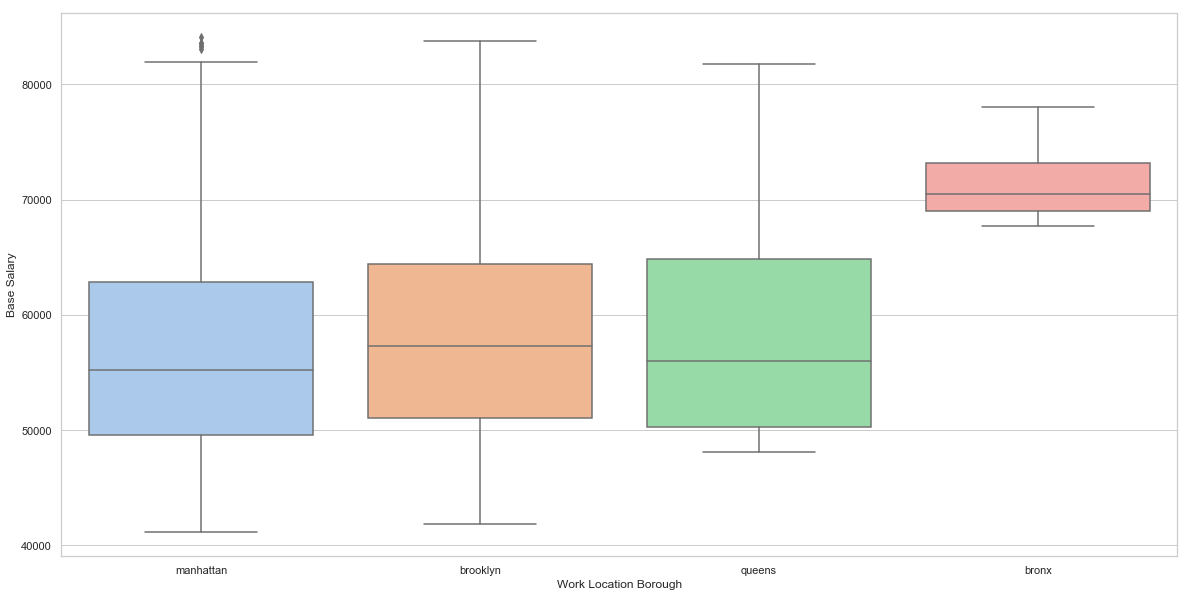

In [240]:
sns.boxplot(x='Work Location Borough', y='Base Salary', data=df_principal)

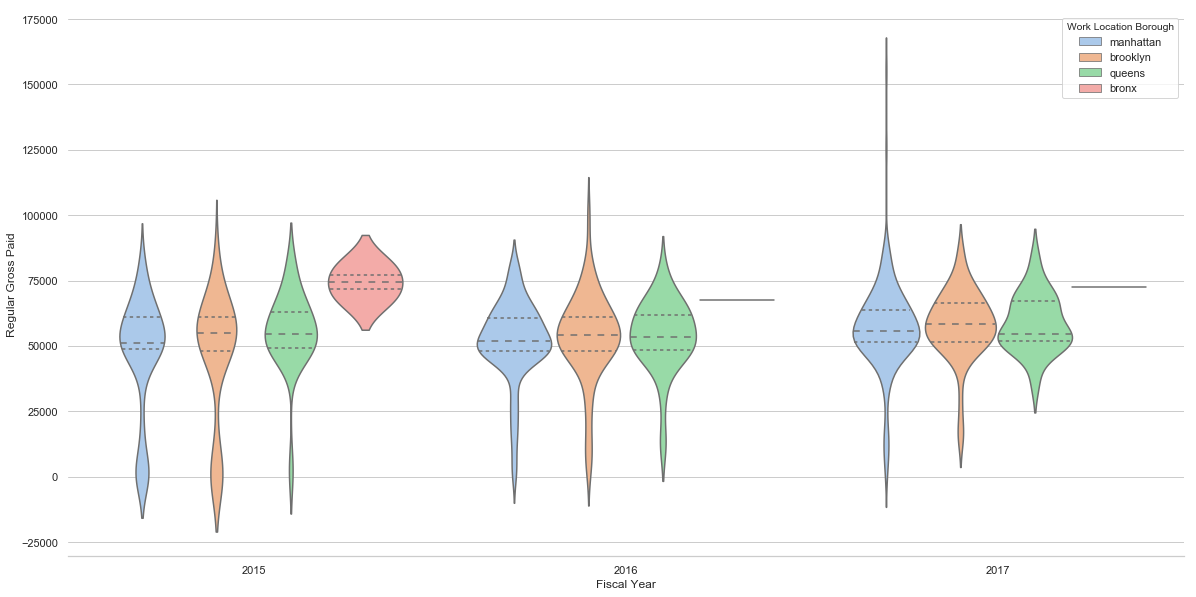

In [241]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Fiscal Year", y="Regular Gross Paid",
               inner="quart",
               hue='Work Location Borough',
               #palette={"Yes": "y", "No": "b"},
               data=df_principal)
sns.despine(left=True)

In [242]:
print('\n\nNUMBER of UNIQUE in EACH column:\n', df_principal.apply(lambda x: x.nunique()))



NUMBER of UNIQUE in EACH column:
 Fiscal Year                     3
Agency Name                     1
Last Name                     274
First Name                    233
Agency Start Date             288
Work Location Borough           4
Title Description               1
Leave Status as of June 30      4
Base Salary                   517
Pay Basis                       1
Regular Hours                 145
Regular Gross Paid            652
OT Hours                      161
Total OT Paid                 256
Total Other Pay               346
dtype: int64


In [203]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
Fiscal Year                   747 non-null int64
Agency Name                   747 non-null object
Last Name                     747 non-null object
First Name                    747 non-null object
Agency Start Date             747 non-null datetime64[ns]
Work Location Borough         747 non-null object
Title Description             747 non-null object
Leave Status as of June 30    747 non-null object
Base Salary                   747 non-null float64
Pay Basis                     747 non-null object
Regular Hours                 747 non-null float64
Regular Gross Paid            747 non-null float64
OT Hours                      747 non-null float64
Total OT Paid                 747 non-null float64
Total Other Pay               747 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(7)
memory usage: 87.6+ KB


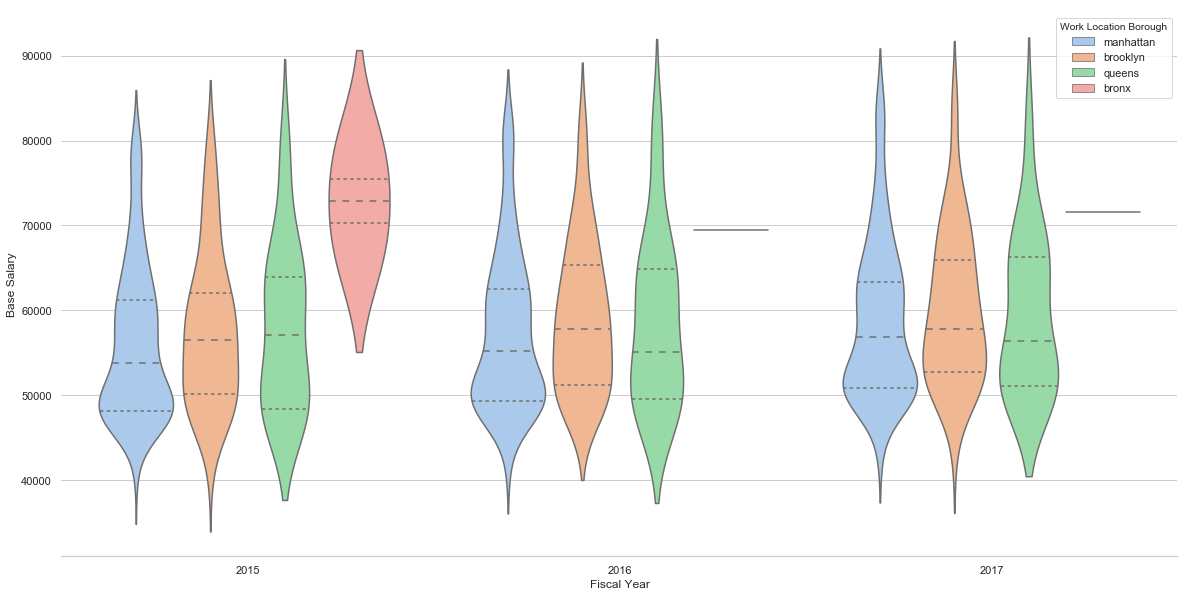

In [248]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Fiscal Year", y="Base Salary",
               inner="quart",
               hue='Work Location Borough',
               #palette={"Yes": "y", "No": "b"},
               data=df_principal)
sns.despine(left=True)

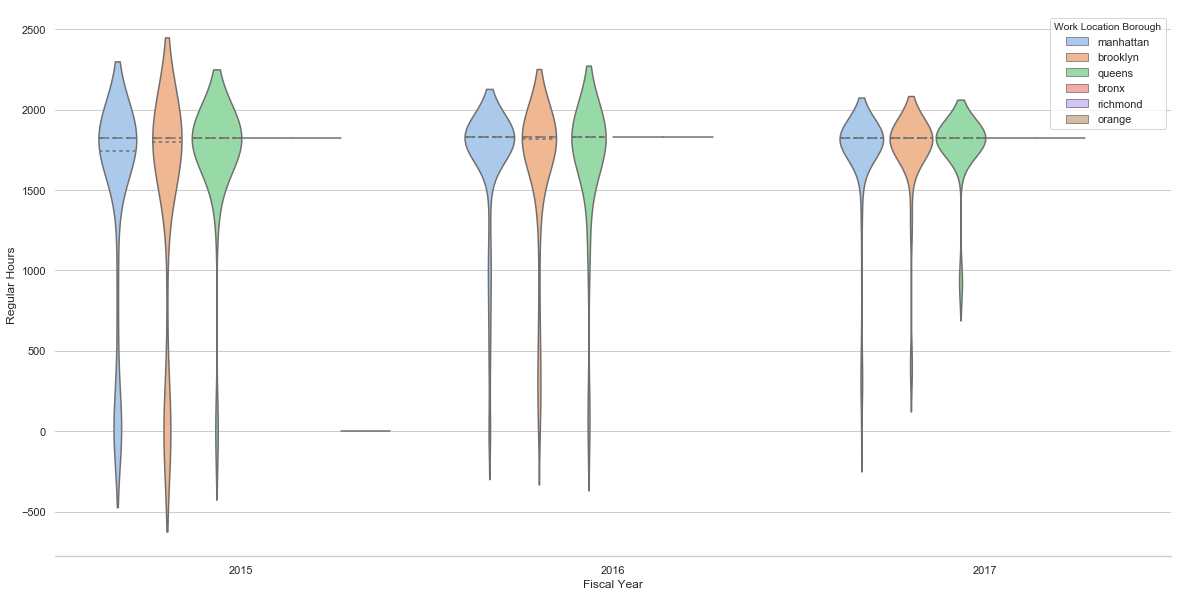

In [205]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Fiscal Year", y="Regular Hours",
               inner="quart",
               hue='Work Location Borough',
               #palette={"Yes": "y", "No": "b"},
               data=df_principal)
sns.despine(left=True)

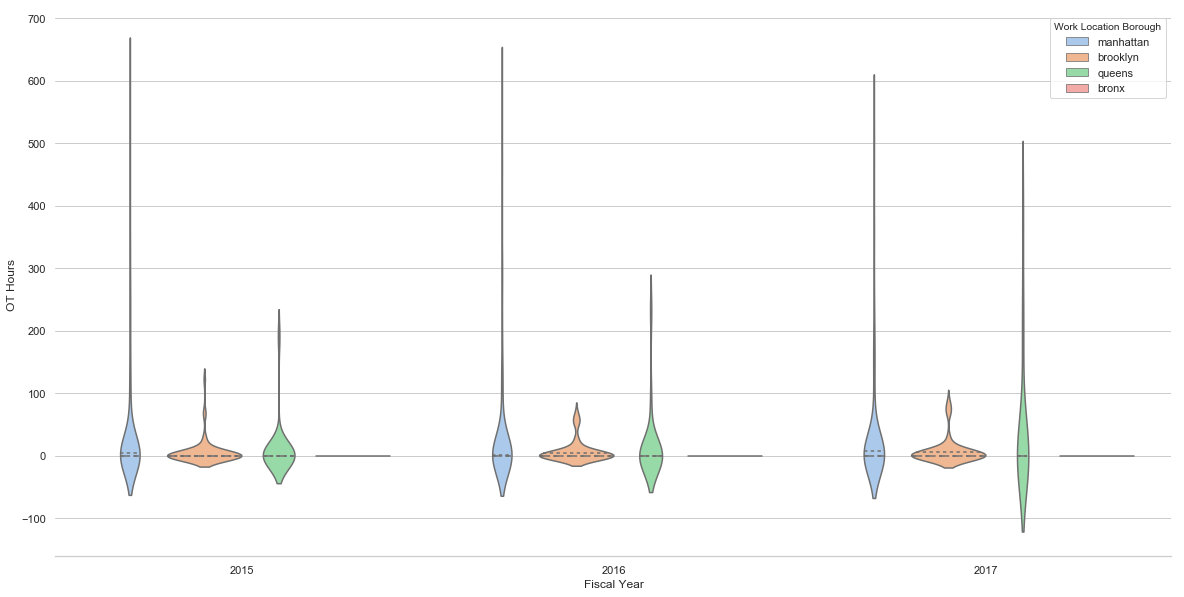

In [243]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Fiscal Year", y="OT Hours",
               inner="quart",
               hue='Work Location Borough',
               #palette={"Yes": "y", "No": "b"},
               data=df_principal)
sns.despine(left=True)

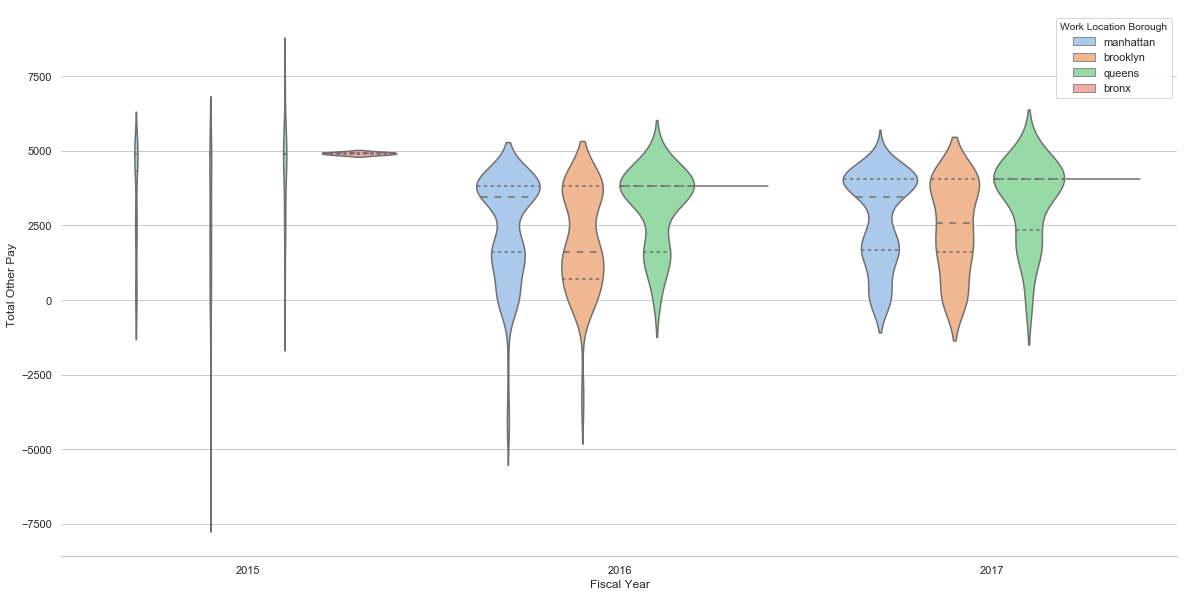

In [245]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Fiscal Year", y="Total Other Pay",
               inner="quart",
               hue='Work Location Borough',
               #palette={"Yes": "y", "No": "b"},
               data=df_principal)
sns.despine(left=True)

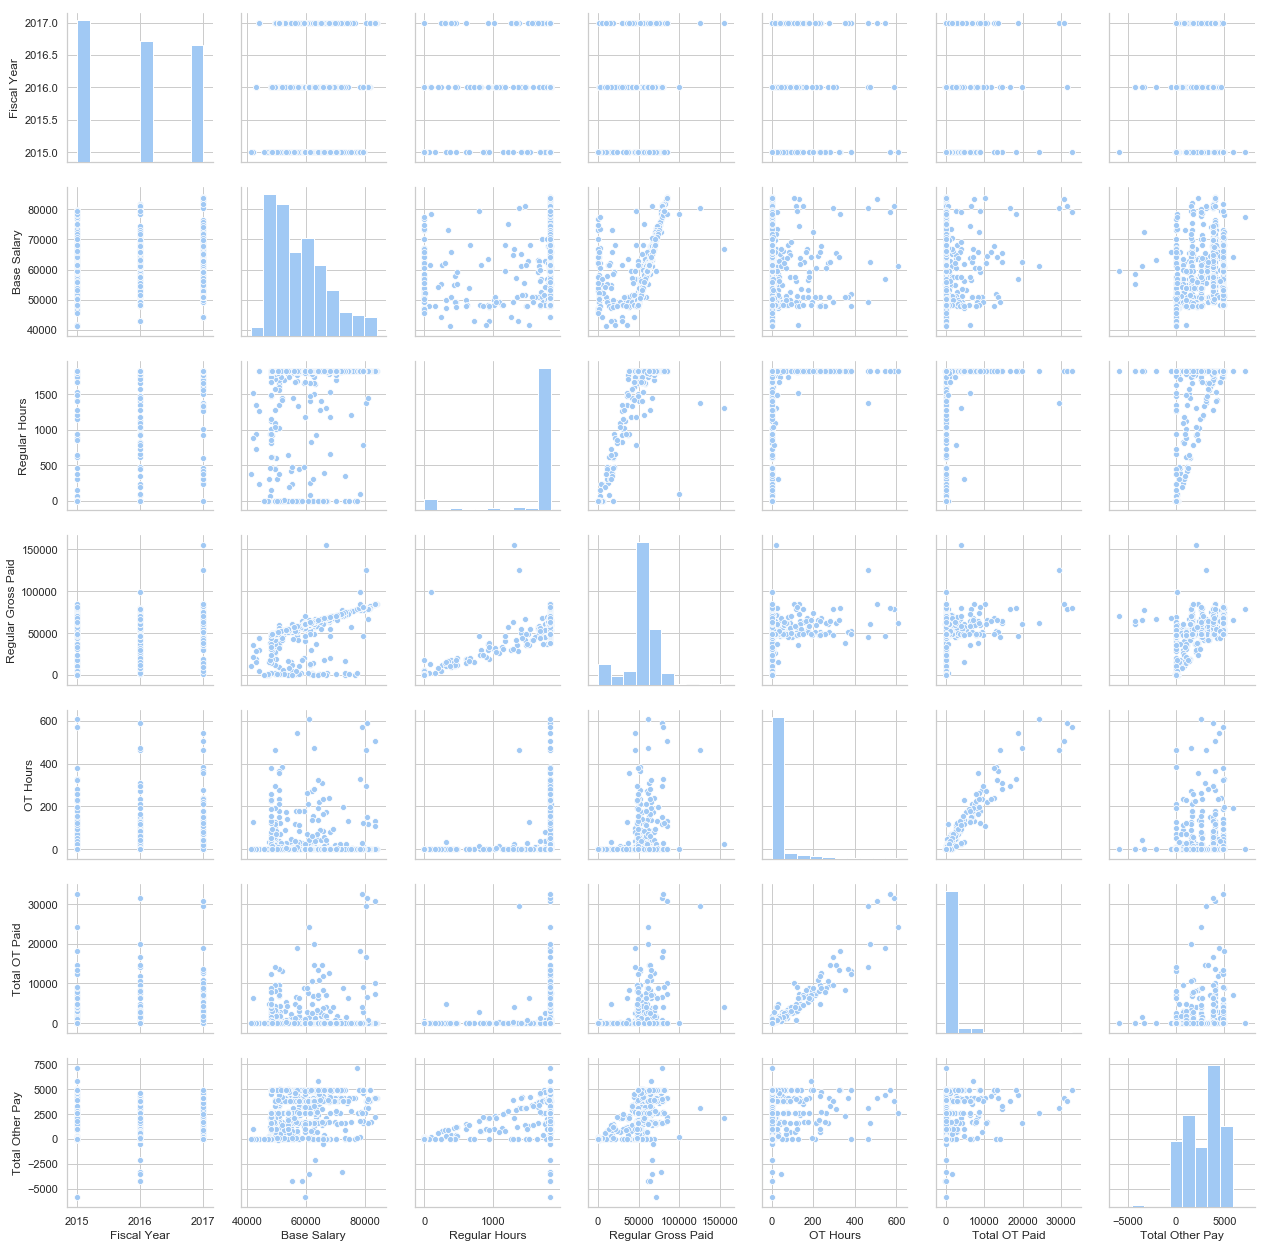

In [247]:
sns.pairplot(df_principal)

`df_principal.to_csv('df_principal.csv')`

# **Principal Component Analysis**
<a href='#question1'></a>

# Assignment 4: QUESTION 1
>Select any appropriate dataset and apply principal component analysis (PCA) for dimension reduction
(feature selection). In doing so, select only the numeric variables. Make sure to standardize them before
applying the PCA technique. Show the newly created features as weights (eigen vectors) in terms of
original features. Explain how the variance distribution in the dataset has changed. Interpret the results.

<a id='question2'></a>
# Assignment 4:  QUESTION 2.
- Select any appropriate dataset and conduct an outlier detection analysis on the dataset. You can
optionally choose to perform a train/test partition or simply work on the entire dataset for the exercise.
Select numeric features for outlier detection and also ensure to standardize the features before the
analysis. Select at least four outlier detection techniques and compare the results with each other.
Select any two key numeric features and create a scatter plot with decision boundaries identifying
outliers. Interpret the results.

## **_Preliminary Imports_**

In [250]:
# Personal imports used in previous assignments/project

import re
from statistics import mode #found on https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list)
import random
from random import choice

# Using https://pypi.org/project/folium/, I was able to work with heat maps.
# I needed to install folium first through the terminal using this command line:  pip install folium
import folium
from folium import plugins
from folium.map import Layer
from folium.utilities import _isnan, _iter_tolist, none_max, none_min
from folium import plugins
from folium.plugins import HeatMap

#######################################################################################################################################

# Some standard imports

import os

# scipy imports
# There are several universal functions for numpy arrays that are available through the scipy package
import scipy as sc
from scipy import stats, integrate
from scipy.stats.mstats import mode

# numpy imports
# pandas depends on numpy
import numpy as np
np.set_printoptions(precision=4, threshold=500, suppress=True)
np.random.seed(12345)
np.random.seed(sum(map(ord, "distributions")))

# pandas imports
# The convention is to import pandas package with a pd prefix. 
# Also, since we most commonly use Series and DataFrame classes from this package, 
# we import them into the current namespace, so we do not have to refer to them with the pd prefix.
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_columns', None) # enables showing all columns
pd.options.display.max_rows = 25
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.notebook_repr_html = True
np.set_printoptions(precision=4, suppress=True)

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.font_manager
plt.rcParams.update({'figure.figsize': (20, 10), 'figure.dpi': 120})
# Prior versions of matplotlib used an implicitly registered datetime converter for a matplotlib plotting method. 
# The converter is registered by pandas on import. 
# Future versions of pandas will require you to explicitly register matplotlib converters, as follows:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
plt.rc('figure', figsize=(10, 6))
#plt.subplots(figsize=(10,6))

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# seaborn imports
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12, 8)})
sns.set(color_codes=True)

# bokeh imports
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') #enable if needed to see the warning the first time.

# logging setup
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# **Part 1 - Initializing the dataset:**
>- **Part 1.1:** **Importing** `df_principal` which is a subset of the dataset from all of NYC public employee wage information.  
(_See Previous Work for the cleaning process of the entire dataset._)
- **Part 1.2:** **Visualizing** some of the descriptives (using `sns.boxplot()` and `sns.pairplot`)
- **Part 1.3:** **Splitting** the data into a train and test set

**note:**  for computational purposes, I used approximately 10% of the data without replacement.  I found with such a **large** dataset, the models were taking a **long** time to run.

## **_Part 1.1:_**  _Importing_

In [258]:
df_principal = pd.read_csv('df_principal.csv', index_col=0)

In [259]:
df_principal.shape

(743, 15)

**To take a sample:** `df_principal = df_principal.sample(frac=0.1, replace=False)`

In [260]:
df_principal.reset_index(inplace=True, drop=True)

In [261]:
df_principal.head()

,Fiscal Year,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2017,department of education admin,barnaby,omaida,1993-06-28,manhattan,principal administrative associate,active,67608.0,per annum,1825.0,68375.82,0.0,0.0,4071.62
1,2017,department of education admin,brown,angella,1998-03-30,brooklyn,principal administrative associate,active,58607.0,per annum,1825.0,59269.63,0.0,0.0,1683.18
2,2017,department of education admin,crawford,colette,1999-12-01,manhattan,principal administrative associate,active,53831.0,per annum,1825.0,54437.70,0.0,0.0,4063.37
3,2017,department of education admin,dunn,michelle,1995-05-08,manhattan,principal administrative associate,active,50858.0,per annum,1825.0,51430.42,0.0,0.0,2355.30
4,2017,department of education admin,galarza,carmen,1986-11-20,manhattan,principal administrative associate,active,72370.0,per annum,1825.0,73193.41,0.0,0.0,4063.37


In [263]:
df_principal.shape

(743, 15)

## **_Part 1.2:_**  _Visualizations_

In [264]:
df_principal.describe()

,Fiscal Year,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,2015.932705,58009.948856,1621.576703,52209.076945,25.331427,1047.362544,2770.254172
std,0.823047,9256.321444,514.783205,18991.073047,78.051811,3513.778041,1776.655202
min,2015.000000,41193.000000,0.000000,3.450000,0.000000,-46.830000,-5882.450000
25%,2015.000000,50295.000000,1825.000000,48348.160000,0.000000,0.000000,1598.430000
50%,2016.000000,56496.000000,1825.000000,53758.880000,0.000000,0.000000,3295.340000
75%,2017.000000,63406.000000,1827.760000,62774.840000,2.625000,99.355000,4063.370000
max,2017.000000,84078.000000,1831.000000,155149.960000,607.000000,32657.810000,7146.750000


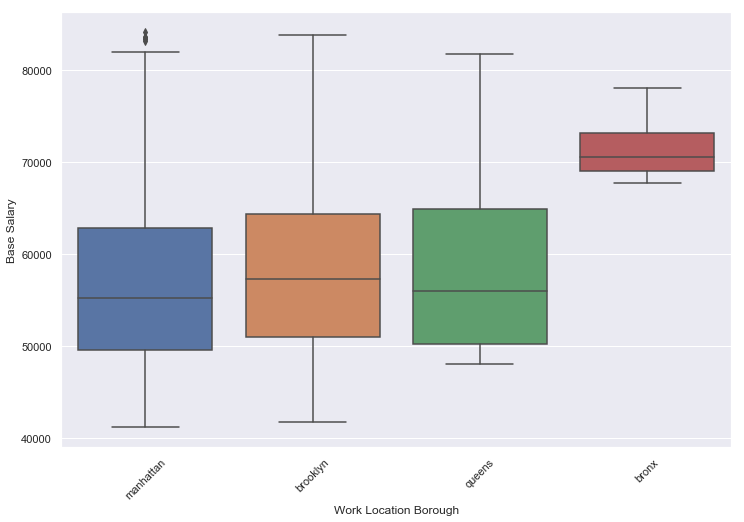

In [265]:
#sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
sns.boxplot(y='Base Salary', x='Work Location Borough', data=df_principal)

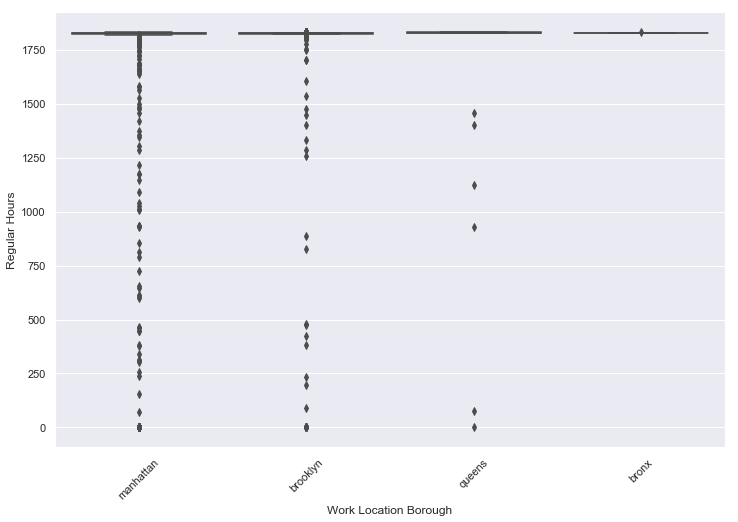

In [266]:
#sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
sns.boxplot(y='Regular Hours', x='Work Location Borough', data=df_principal)

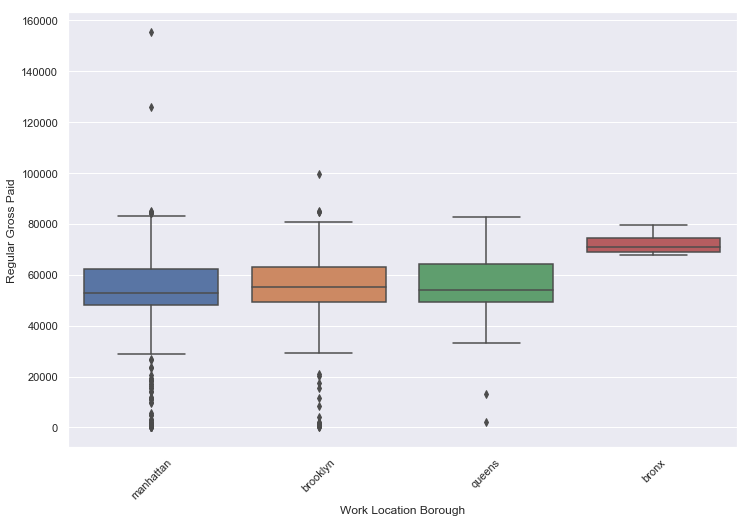

In [267]:
#sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
sns.boxplot(y='Regular Gross Paid', x='Work Location Borough', data=df_principal)

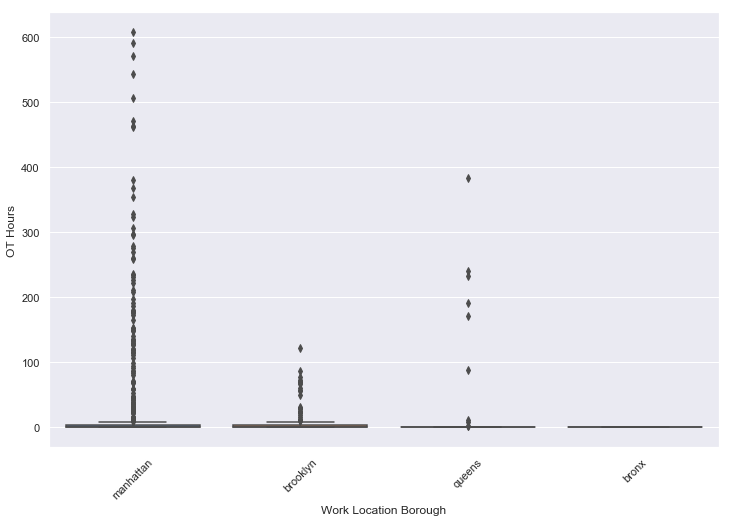

In [268]:
#sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
sns.boxplot(y='OT Hours', x='Work Location Borough', data=df_principal)

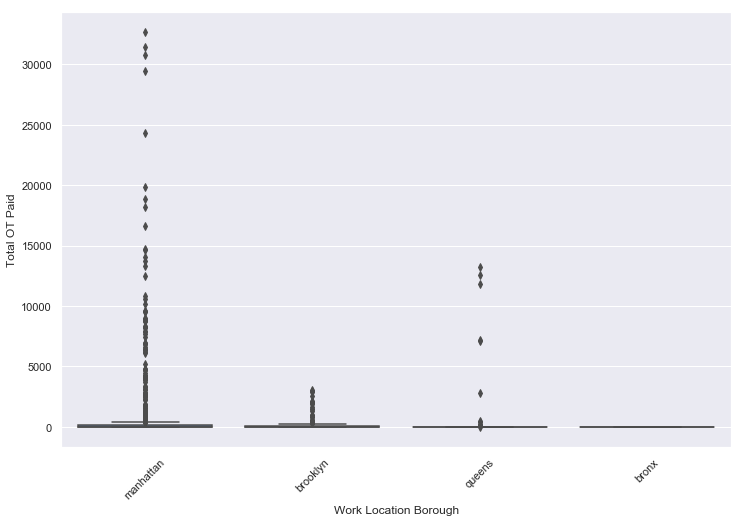

In [269]:
#sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
sns.boxplot(y='Total OT Paid', x='Work Location Borough', data=df_principal)

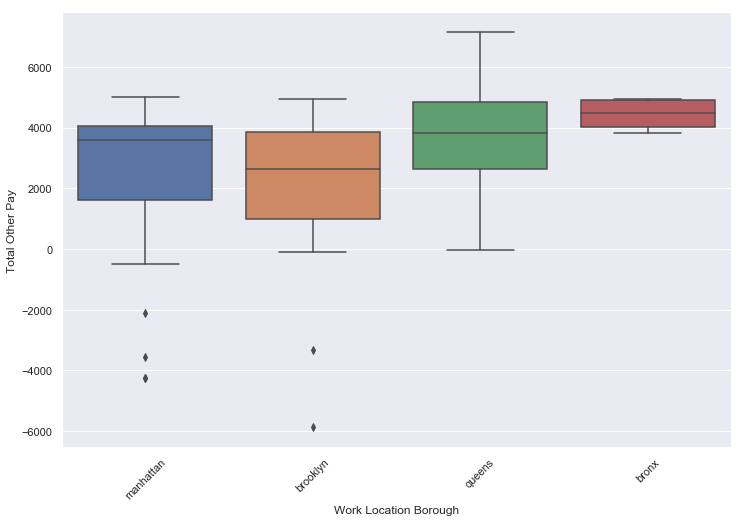

In [270]:
#sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=45)
sns.boxplot(y='Total Other Pay', x='Work Location Borough', data=df_principal)

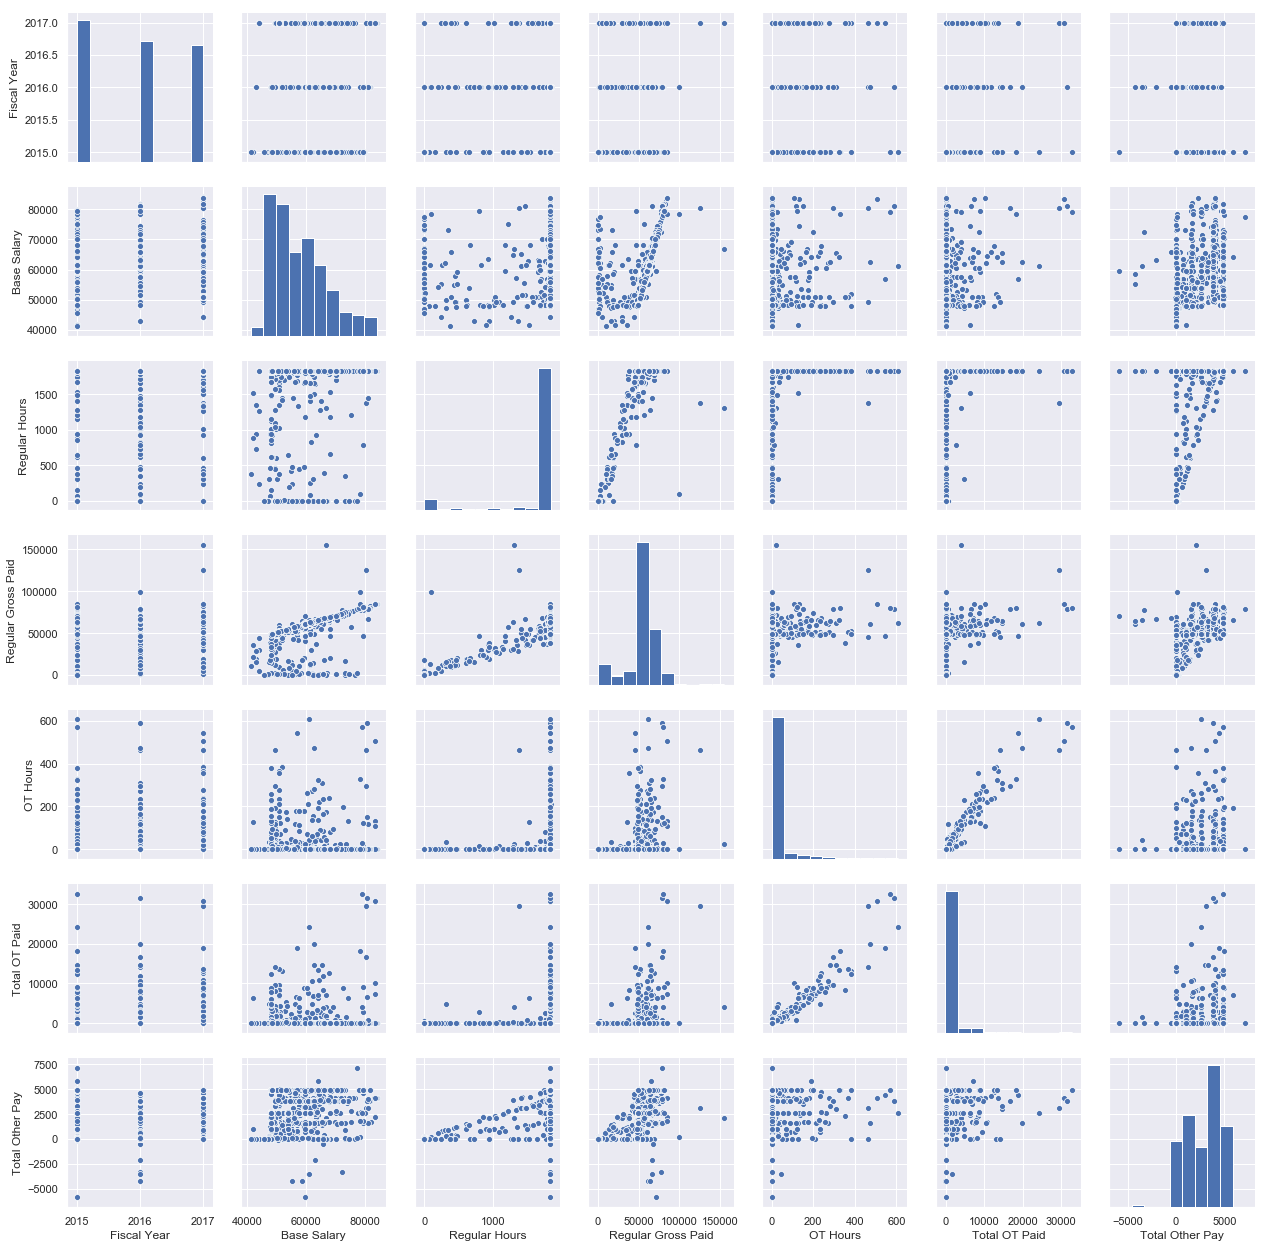

In [271]:
sns.pairplot(df_principal)

## **_Part 1.3:_**  _Splitting the Dataset_
- Using sklearn.model_selection to create a train/test split (80% - 20%)

In [272]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_principal, test_size=0.2)

# Here, I am making a dataframe for both train and test

df_train = train
df_train.reset_index(inplace=True, drop=True)
df_test = test
df_test.reset_index(inplace=True, drop=True)

print("\nTraining dataset head():\n", df_train.head())
print("\nTesting dataset head():\n", df_test.head())


Training dataset head():
    Fiscal Year                    Agency Name    Last Name  First Name  \
0         2017  department of education admin      cordero      evelyn   
1         2015  department of education admin         leon  evangelina   
2         2015  department of education admin       medina    elizabet   
3         2017  department of education admin  cruickshank       joyce   
4         2015  department of education admin       elmore      devory   

  Agency Start Date Work Location Borough                   Title Description  \
0        2008-02-03                queens  principal administrative associate   
1        2012-03-04             manhattan  principal administrative associate   
2        1980-06-11              brooklyn  principal administrative associate   
3        1988-10-03             manhattan  principal administrative associate   
4        1997-01-07              brooklyn  principal administrative associate   

  Leave Status as of June 30  Base Salary

# **Part 2: Assignment 4 Question 2**
## **_Part 2.1:_**  _Run at least 4 models_

>- **Part 2.1.1**: Model 1 "Local Outlier Factor" `LOF()`
- **Part 2.1.2**: Model 2 "k-Nearest Neighbors" `KNN()`
- **Part 2.1.3**: Model 3 "Clustering Based Local Outlier Factor" `CBLOF()`
- **Part 2.1.4**: Model 4 "Histogram-based Outlier Detection" `HBOS()`

## **_Part 2.2:_**  _Compare the models_

>- Part 2.2:  Select at least four outlier detection techniques and compare the results with each other.  Select any two key numeric features and create a scatter plot with decision boundaries identifying outliers. 

## **_Part 2.3:_**  _Interpret the models_

>- Part 2.3:  My interpretation of what the models represent.

### **_Part 2.1.1:_** Model 1 - "Local Outlier Factor" `LOF()`

#### - [Local Outlier Factor (LOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.lof)
> - Wrapper of scikit-learn LOF Class with more functionalities. 
- Unsupervised Outlier Detection using Local Outlier Factor (LOF).
- The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers. 


##### Basic Logic
- For each point, compute the density of its local neighborhood
- Compute local outlier factor (LOF) of a sample p as the average of the ratios of the density of sample p and the density of its nearest neighbors
- Outliers are points with largest LOF value

##### Resources
- [Local Outlier Factor for Anomaly Detection: A short summary about Local Outlier Factor](https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe) (Nice example of LOF)
- [Local Outlier Factor: Example By Hand](https://medium.com/@mtngt/local-outlier-factor-example-by-hand-b57cedb10bd1)
- [LOF Example in Slides](http://www.cse.ust.hk/~leichen/courses/comp5331/lectures/LOF_Example.pdf) by Prof. Lei Chen
- [Wikipedia Link](https://en.wikipedia.org/wiki/Local_outlier_factor)
- Normal data points have LOF scores close to 1 (their LRD is the same as the one of their neighbors), whereas anomalies have higher LOF scores (their LRD is larger). A rule of thumb says that LOF values larger than 1.2 (or 2.0) may indicate outliers, depending on the dataset.
    - LOF(k) ~ 1 means Similar density as neighbors
    - LOF(k) < 1 means Higher density than neighbors (Inlier)
    - LOF(k) > 1 means Lower density than neighbors (Outlier)

In [273]:
from pyod.models.lof import LOF # proximity

# train LOF detector
clf_name = 'LOF' 
clf = LOF()
clf.fit(df_train[['Base Salary','Regular Hours','Regular Gross Paid','OT Hours','Total OT Paid','Total Other Pay']])
y_pred_LOF = clf.predict(df_train[['Base Salary','Regular Hours','Regular Gross Paid','OT Hours','Total OT Paid','Total Other Pay']])

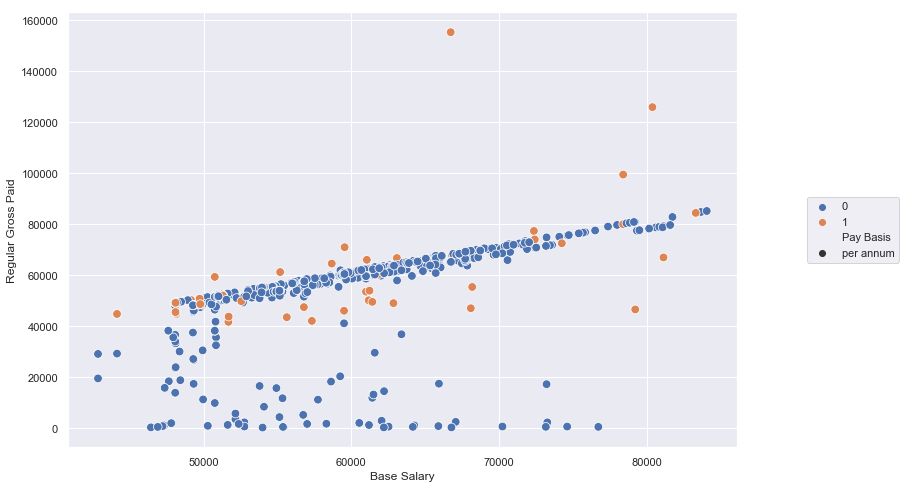

In [274]:
g = sns.scatterplot('Base Salary', 'Regular Gross Paid', data=df_train, hue=y_pred_LOF, style='Pay Basis', s=75)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1) # Put a legend to the right side

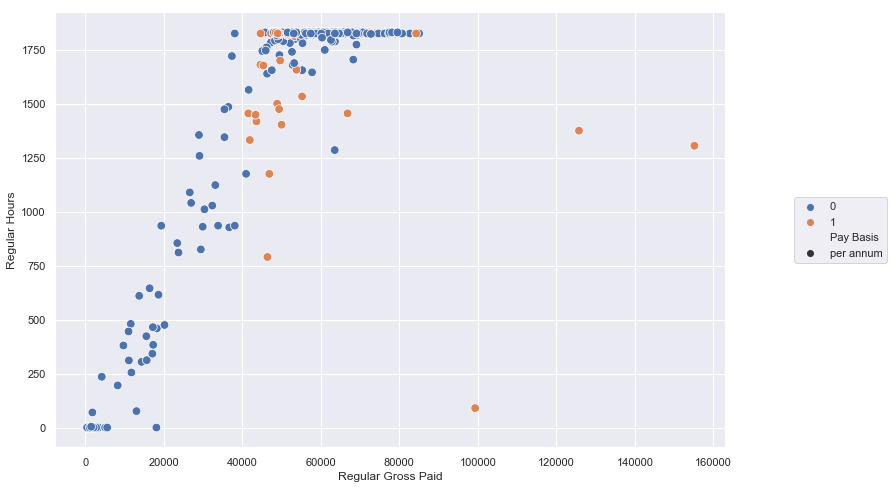

In [275]:
g = sns.scatterplot('Regular Gross Paid', 'Regular Hours', data=df_train, hue=y_pred_LOF, style='Pay Basis', s=75)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1) # Put a legend to the right side

### **_Part 2.1.2:_** Model 2 "k-Nearest Neighbors" `KNN()`

### [k-Nearest Neighbors](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.knn)

> - For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score
- PyOD supports three kNN detectors:
    - **Largest**: Uses the distance of the kth neighbor as the outlier score
    - **Mean**: Uses the average of all k neighbors as the outlier score
    - **Median**: Uses the median of the distance to k neighbors as the outlier score
    
(Reference: [An Awesome Tutorial to Learn Outlier Detection in Python using PyOD Library](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/))

**Research Papers on Efficient k-NN Algorithms: [Paper 1](https://webdocs.cs.ualberta.ca/~zaiane/pub/check/ramaswamy.pdf), [Paper 2](https://www.researchgate.net/profile/Clara_Pizzuti/publication/220699183_Fast_Outlier_Detection_in_High_Dimensional_Spaces/links/542ea6a60cf27e39fa9635c6.pdf)**

#### Distance Metrics
- [Distance Metrics from `SciPy`](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)
- [Distance Metrics from `Scikit-Learn`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

In [276]:
from pyod.models.knn import KNN # proximity

# train LOF detector
clf_name = 'KNN' 
clf = KNN()
clf.fit(df_train[['Base Salary','Regular Hours','Regular Gross Paid','OT Hours','Total OT Paid','Total Other Pay']])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [277]:
y_pred_KNN = clf.predict(df_train[['Base Salary','Regular Hours','Regular Gross Paid','OT Hours','Total OT Paid','Total Other Pay']])

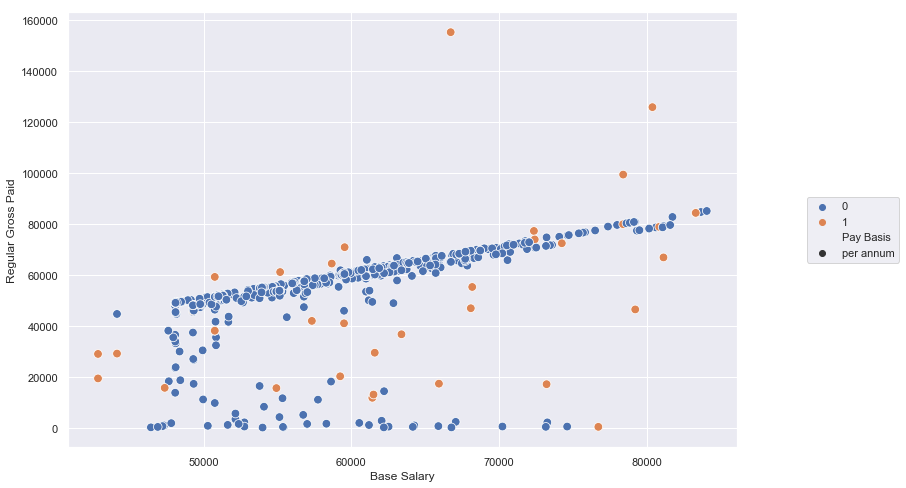

In [278]:
sns.set(rc={'figure.figsize':(12,8)})
g = sns.scatterplot('Base Salary', 'Regular Gross Paid', data=df_train, hue=y_pred_KNN, style='Pay Basis', s=75)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1) # Put a legend to the right side

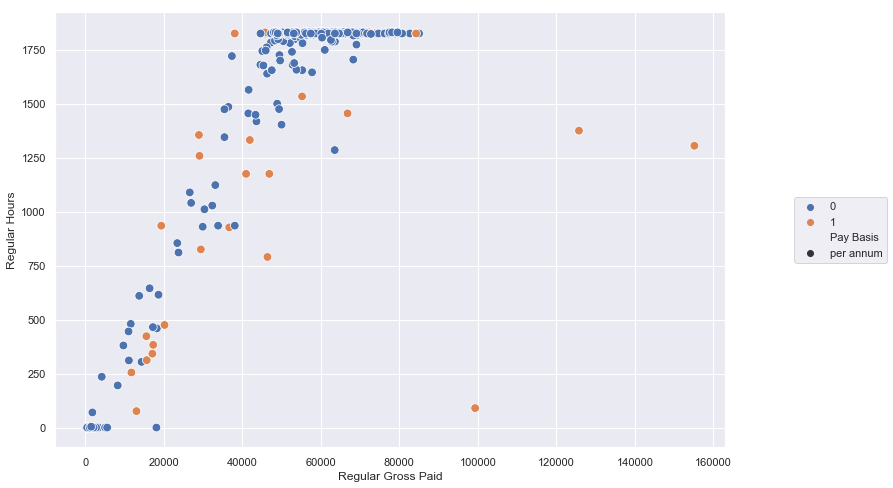

In [279]:
sns.set(rc={'figure.figsize':(12, 8)})
g = sns.scatterplot('Regular Gross Paid', 'Regular Hours', data=df_train, hue=y_pred_KNN, style='Pay Basis', s=75)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1) # Put a legend to the right side

### **_Part 2.1.3:_** Model 3 "Clustering Based Local Outlier Factor" `CBLOF()`

#### [Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
> - The CBLOF operator calculates the outlier score based on cluster-based local outlier factor.
- CBLOF takes as an input the data set and the cluster model that was generated by a clustering algorithm. It classifies the clusters into small clusters and large clusters using the parameters alpha and beta. The anomaly score is then calculated based on the size of the cluster the point belongs to as well as the distance to the nearest large cluster.
- Use weighting for outlier factor based on the sizes of the clusters as proposed in the original publication. Since this might lead to unexpected behavior (outliers close to small clusters are not found), it is disabled by default. **Outliers scores are solely computed based on their distance to the closest large cluster center.**
- By default, kMeans is used for clustering algorithm instead of Squeezer algorithm mentioned in the original paper for multiple reasons.
- Parameter α should be set to the amount of expected normal instances, whereas β can be left to its default—it does not have any influence on most cases.

#### Resources
- [Research Paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.20.4242&rep=rep1&type=pdf)

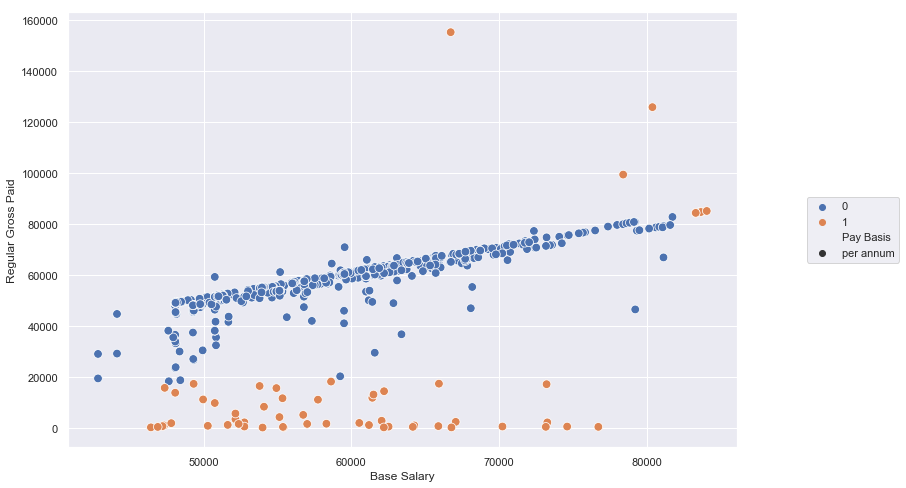

In [280]:
from pyod.models.cblof import CBLOF # proximity

# train CBLOF detector
clf_name = 'CBLOF' 
clf = CBLOF()
clf.fit(df_train[['Base Salary','Regular Hours','Regular Gross Paid','OT Hours','Total OT Paid','Total Other Pay']])
y_pred_CBLOF = clf.predict(df_train[['Base Salary','Regular Hours','Regular Gross Paid','OT Hours','Total OT Paid','Total Other Pay']])

g = sns.scatterplot('Base Salary', 'Regular Gross Paid', data=df_train, hue=y_pred_CBLOF, style='Pay Basis', s=75)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1) # Put a legend to the right side

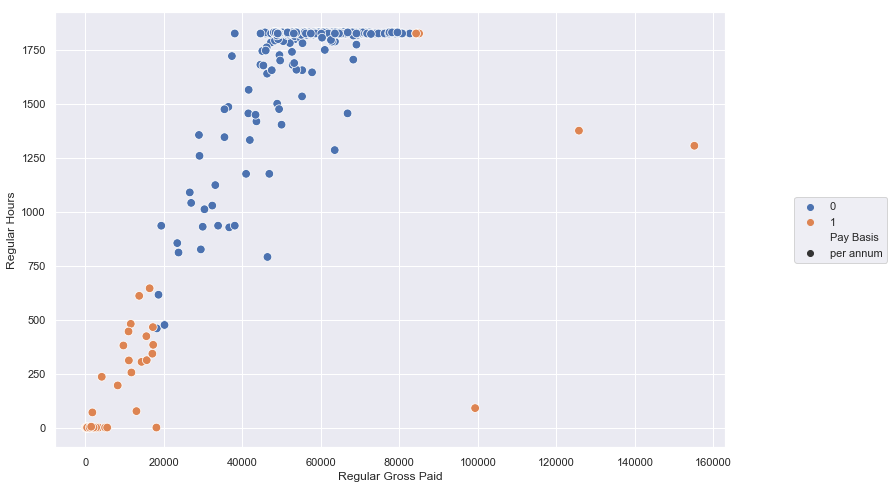

In [281]:
g = sns.scatterplot('Regular Gross Paid', 'Regular Hours', data=df_train, hue=y_pred_CBLOF, style='Pay Basis', s=75)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1) # Put a legend to the right side

### **_Part 2.1.4:_** Model 4 "Histogram-based Outlier Detection" `HBOS()`

#### [Histogram-based Outlier Detection (HBOS)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.hbos)
> - Histogram-based outlier detection (HBOS) is an efficient unsupervised method. 
- It assumes the feature independence and calculates the degree of outlyingness by building histograms. 
- It is much faster than multivariate approaches, but at the cost of less precision

#### Resources
- [Research Paper](https://www.goldiges.de/publications/HBOS-KI-2012.pdf)

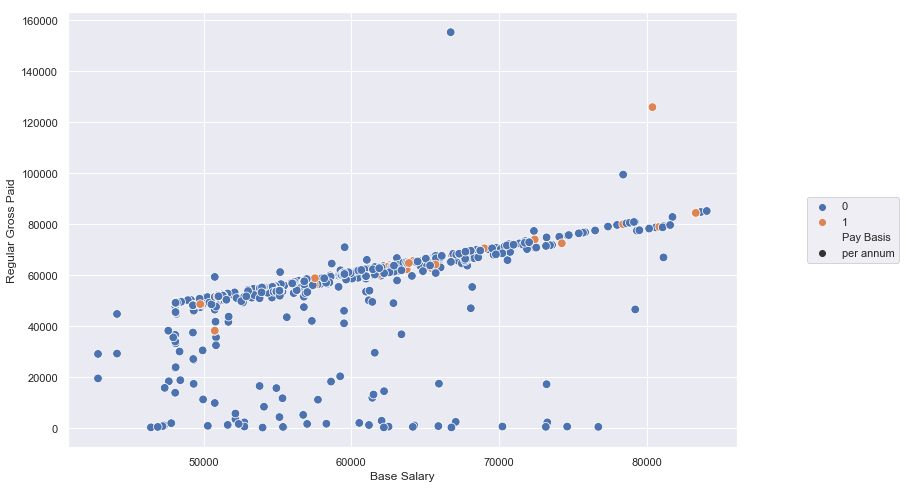

In [282]:
from pyod.models.hbos import HBOS # proximity

# train HBOS detector
clf_name = 'HBOS' 
clf = HBOS()
clf.fit(df_train[['Base Salary','Regular Hours','Regular Gross Paid','OT Hours','Total OT Paid','Total Other Pay']])
y_pred_HBOS = clf.predict(df_train[['Base Salary','Regular Hours','Regular Gross Paid','OT Hours','Total OT Paid','Total Other Pay']])

g = sns.scatterplot('Base Salary', 'Regular Gross Paid', data=df_train, hue=y_pred_HBOS, style='Pay Basis', s=75)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1) # Put a legend to the right side

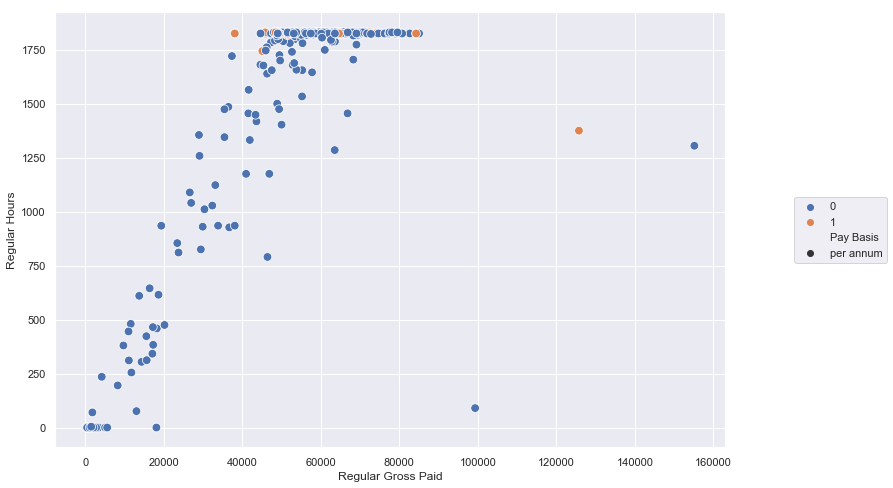

In [283]:
g = sns.scatterplot('Regular Gross Paid', 'Regular Hours', data=df_train, hue=y_pred_HBOS, style='Pay Basis', s=75)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1) # Put a legend to the right side

## **_Part 2.2:_** Comparing Models:

In [284]:
# Standardizing the dataset.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_train[['Base Salary', 'Regular Gross Paid']] = scaler.fit_transform(df_train[['Base Salary', 'Regular Gross Paid']])
df_train[['Base Salary', 'Regular Gross Paid']].head()

,Base Salary,Regular Gross Paid
0,0.216438,0.334615
1,0.126777,0.314992
2,0.330891,0.370952
3,0.223837,0.338974
4,0.127335,0.316510


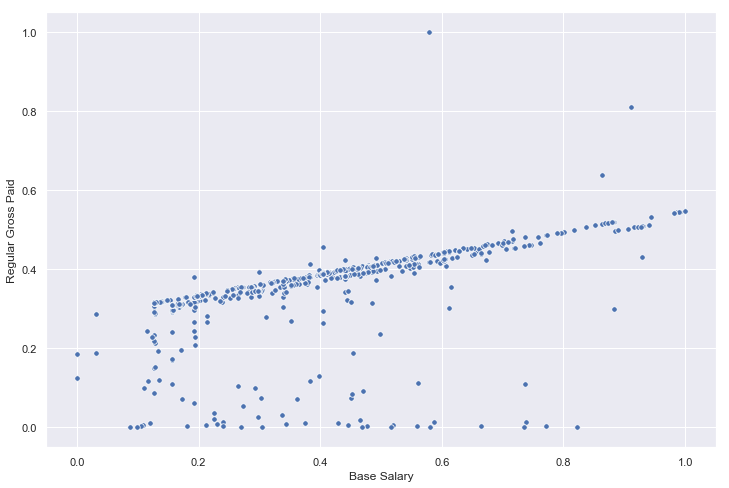

In [285]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot('Base Salary', 'Regular Gross Paid', data=df_train, s=30)

In [286]:
X = df_train[['Base Salary', 'Regular Gross Paid']]
X.head()

,Base Salary,Regular Gross Paid
0,0.216438,0.334615
1,0.126777,0.314992
2,0.330891,0.370952
3,0.223837,0.338974
4,0.127335,0.316510


In [287]:
from pyod.models.lof import LOF # proximity

# train LOF detector
clf_name = 'LOF' 
clf = LOF()
clf.fit(X)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, p=2)

In [288]:
# predict raw anomaly score
scores_pred = clf.decision_function(X)
scores_pred

array([1.5677, 1.1604, 1.0067, ..., 1.0914, 0.9794, 1.1614])

In [289]:
# prediction of a datapoint category outlier or inlier
y_pred = clf.predict(X)

n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

In [290]:
n_inliers, n_outliers

(539, 55)

In [291]:
X[y_pred == 1][:10] # outliers

,Base Salary,Regular Gross Paid
42,0.163942,0.311107
54,0.201931,0.321076
56,0.214182,0.267270
59,0.197661,0.319848
63,0.214618,0.280593
64,0.126777,0.305689
84,0.126777,0.308608
101,0.191815,0.244972
118,0.163917,0.311101
137,0.405148,0.456171


In [292]:
X[y_pred == 0][:10] # inliers

,Base Salary,Regular Gross Paid
0,0.216438,0.334615
1,0.126777,0.314992
2,0.330891,0.370952
3,0.223837,0.338974
4,0.127335,0.316510
5,0.208432,0.337753
6,0.298093,0.346002
7,0.321455,0.340040
8,0.581607,0.435216
9,0.357333,0.361240


In [293]:
# Import models
from pyod.models.knn import KNN # proximity
from pyod.models.abod import ABOD # proximity
from pyod.models.cblof import CBLOF # proximity
from pyod.models.hbos import HBOS # proximity
from pyod.models.lof import LOF # proximity
from pyod.models.feature_bagging import FeatureBagging # ensembling
from pyod.models.iforest import IForest # ensembling


outliers_fraction = 0.05
random_state = np.random.RandomState(12345)

# Define seven outlier detection tools to be compared
classifiers = {'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
               'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
               'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
               'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
               'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
               'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
               'Average KNN': KNN(method='mean',contamination=outliers_fraction)}

In [294]:
X1 = df_train[['Base Salary']].values.reshape(-1,1)
X2 = df_train[['Regular Gross Paid']].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)
X[:5]

array([[0.2164, 0.3346],
       [0.1268, 0.315 ],
       [0.3309, 0.371 ],
       [0.2238, 0.339 ],
       [0.1273, 0.3165]])

In [295]:
X = df_train[['Base Salary', 'Regular Gross Paid']]
X.head()

,Base Salary,Regular Gross Paid
0,0.216438,0.334615
1,0.126777,0.314992
2,0.330891,0.370952
3,0.223837,0.338974
4,0.127335,0.316510


OUTLIERS :  0 INLIERS :  594 Angle-based Outlier Detector (ABOD)


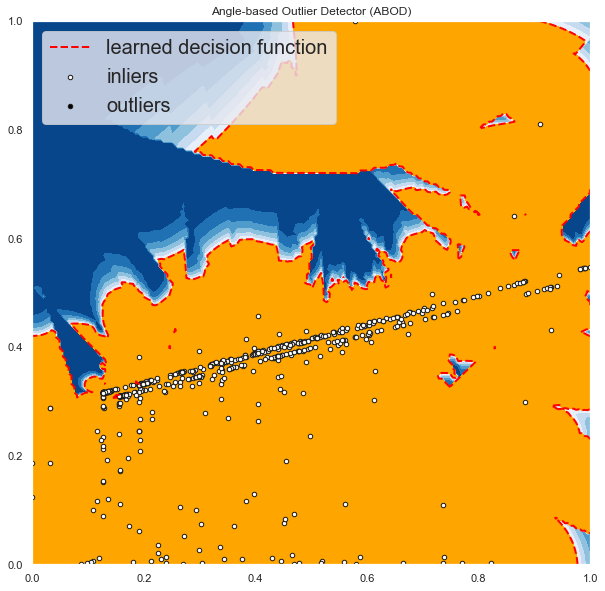

OUTLIERS :  30 INLIERS :  564 Cluster-based Local Outlier Factor (CBLOF)


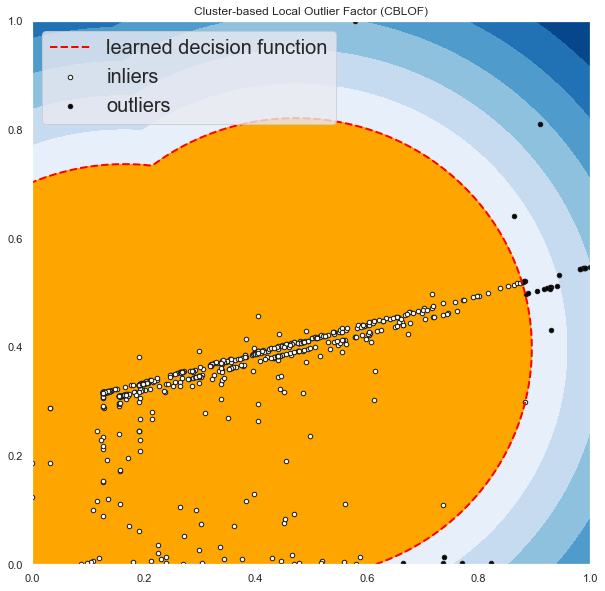

OUTLIERS :  24 INLIERS :  570 Feature Bagging


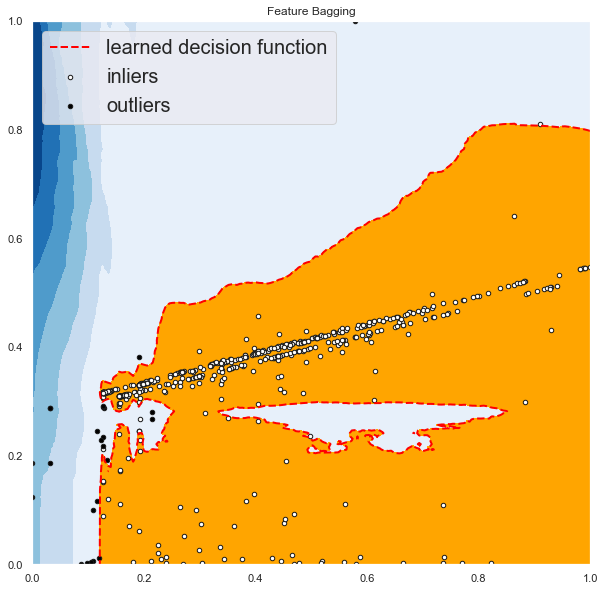

OUTLIERS :  19 INLIERS :  575 Histogram-base Outlier Detection (HBOS)


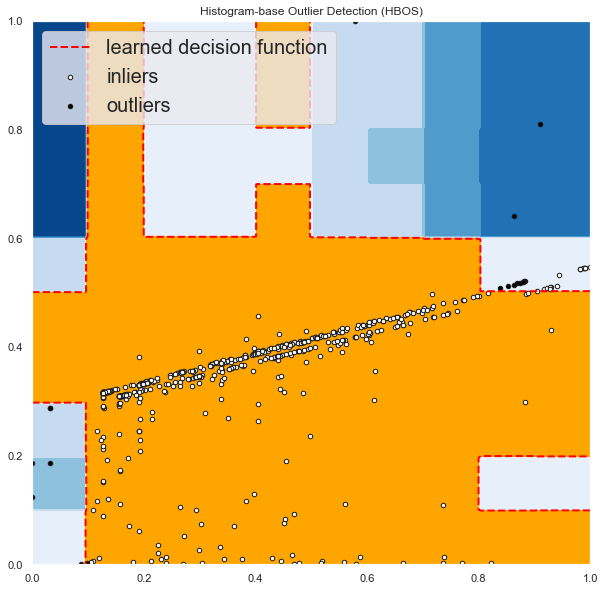

OUTLIERS :  29 INLIERS :  565 Isolation Forest


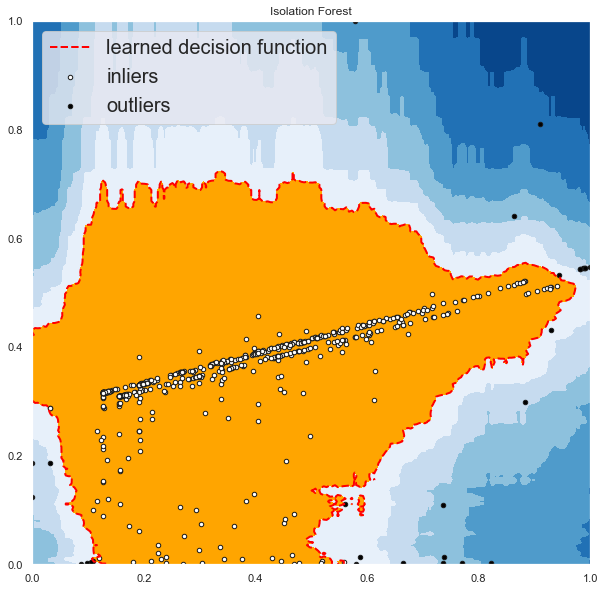

OUTLIERS :  23 INLIERS :  571 K Nearest Neighbors (KNN)


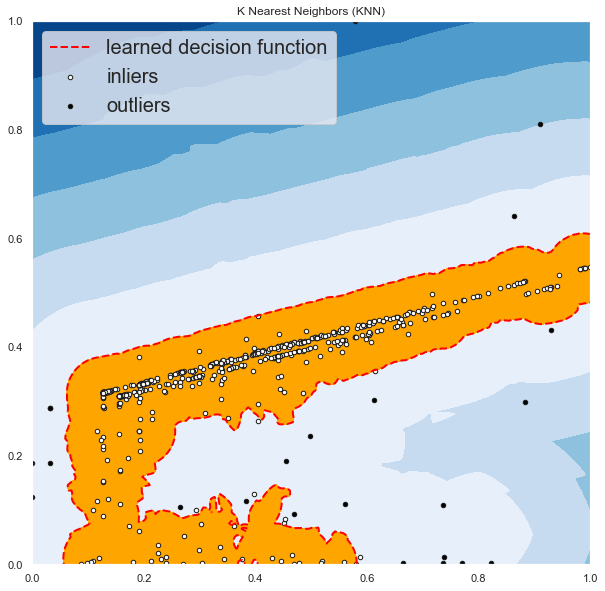

OUTLIERS :  17 INLIERS :  577 Average KNN


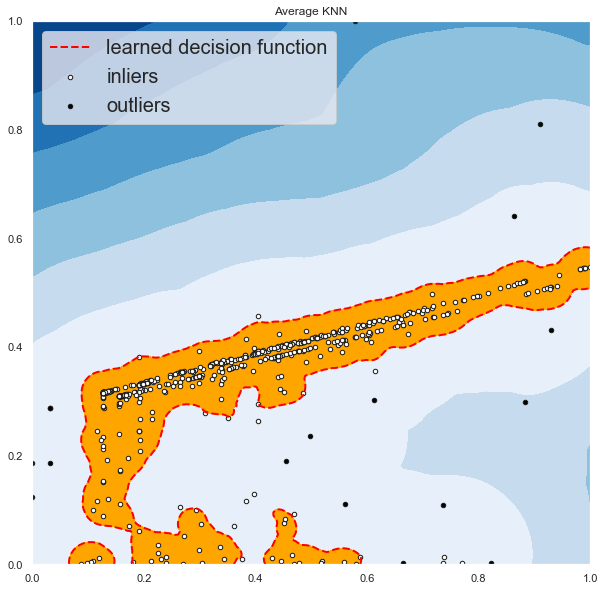

In [296]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df_train
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  dfx['Base Salary'][dfx['outlier'] == 0].values
    IX2 =  dfx['Regular Gross Paid'][dfx['outlier'] == 0].values
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Base Salary'][dfx['outlier'] == 1].values
    OX2 =  dfx['Regular Gross Paid'][dfx['outlier'] == 1].values
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r, linestyles='dashed')
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red', linestyles='dashed')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange', linestyles='dashed')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()


## **_Part 2.3:_** Interpret the Models
PyOD Method | No. Outliers | No. Inliers
:--: | :--: | :--:
**ABOD** | 0 | 594
**CBLOF** | 30 | 564
**Feature Bagging** | 24 | 570
**HBOS** | 19 | 575
**Isolation Forrest** | 29 | 565
**kNN** | 23 | 571
**Average kNN** | 17 | 577


The above table displays the comparisons of outlier detections.  I believe that Angle Based Outlier Detection (**ABOD**) is probably the least effective in this case.  However, Cluster-based Local Outlier Factor (**CBLOF**) seems to be the most effective detector of outliers.  In this case, I would probably choose to go with kNN as you would want the salaries of administrators to be closely aligned with colleagues.